In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
import matplotlib.pyplot as plt

# Parameters

In [2]:
surface_code_sq = 5

In [3]:
if surface_code_sq%2 ==0:
    raise Exception('surface_code_sq should be odd')

In [4]:
# n,k,d
n = (surface_code_sq**2)//2 + 1

# Logical Qubit

In [5]:
data_qubits = QuantumRegister(n, 'd')
ancilla_qubits = QuantumRegister(n-1, 'a')
syndrome_cregs = ClassicalRegister(n-1, 'syndrome')

In [6]:
logical_qubit_array = []

for i in range(n):
    logical_qubit_array.append(data_qubits[i])
    if i < n-1:
        logical_qubit_array.append(ancilla_qubits[i])

In [7]:
logical_qubit_array = np.array(logical_qubit_array)

In [8]:
logical_qubit_array = logical_qubit_array.reshape(surface_code_sq, surface_code_sq)

In [13]:
qc = QuantumCircuit(data_qubits, ancilla_qubits, syndrome_cregs)
qc.h(ancilla_qubits)
qc.barrier()

for row_index in range(0, surface_code_sq, 2):
    for col_index in range(1, surface_code_sq, 2):
        x_ancilla_qubit = logical_qubit_array[row_index, col_index]
        for i, j in ((0, -1), (-1, 0), (0, 1), (1, 0)):
            data_qubit_row_index = row_index + i
            data_qubit_col_index = col_index + j
            if data_qubit_row_index > -1 and data_qubit_col_index > -1 and data_qubit_row_index < surface_code_sq and data_qubit_col_index < surface_code_sq:
                data_qubit = logical_qubit_array[data_qubit_row_index, data_qubit_col_index]
                qc.cx(x_ancilla_qubit, data_qubit)
            

for row_index in range(1, surface_code_sq, 2):
    for col_index in range(0, surface_code_sq, 2):
        z_ancilla_qubit = logical_qubit_array[row_index, col_index]
        for i, j in ((0, -1), (-1, 0), (0, 1), (1, 0)):
            data_qubit_row_index = row_index + i
            data_qubit_col_index = col_index + j
            if data_qubit_row_index > -1 and data_qubit_col_index > -1 and data_qubit_row_index < surface_code_sq and data_qubit_col_index < surface_code_sq:
                data_qubit = logical_qubit_array[data_qubit_row_index, data_qubit_col_index]
                qc.cz(z_ancilla_qubit, data_qubit)

qc.barrier()
qc.h(ancilla_qubits)
qc.barrier()
qc.measure(ancilla_qubits, syndrome_cregs)

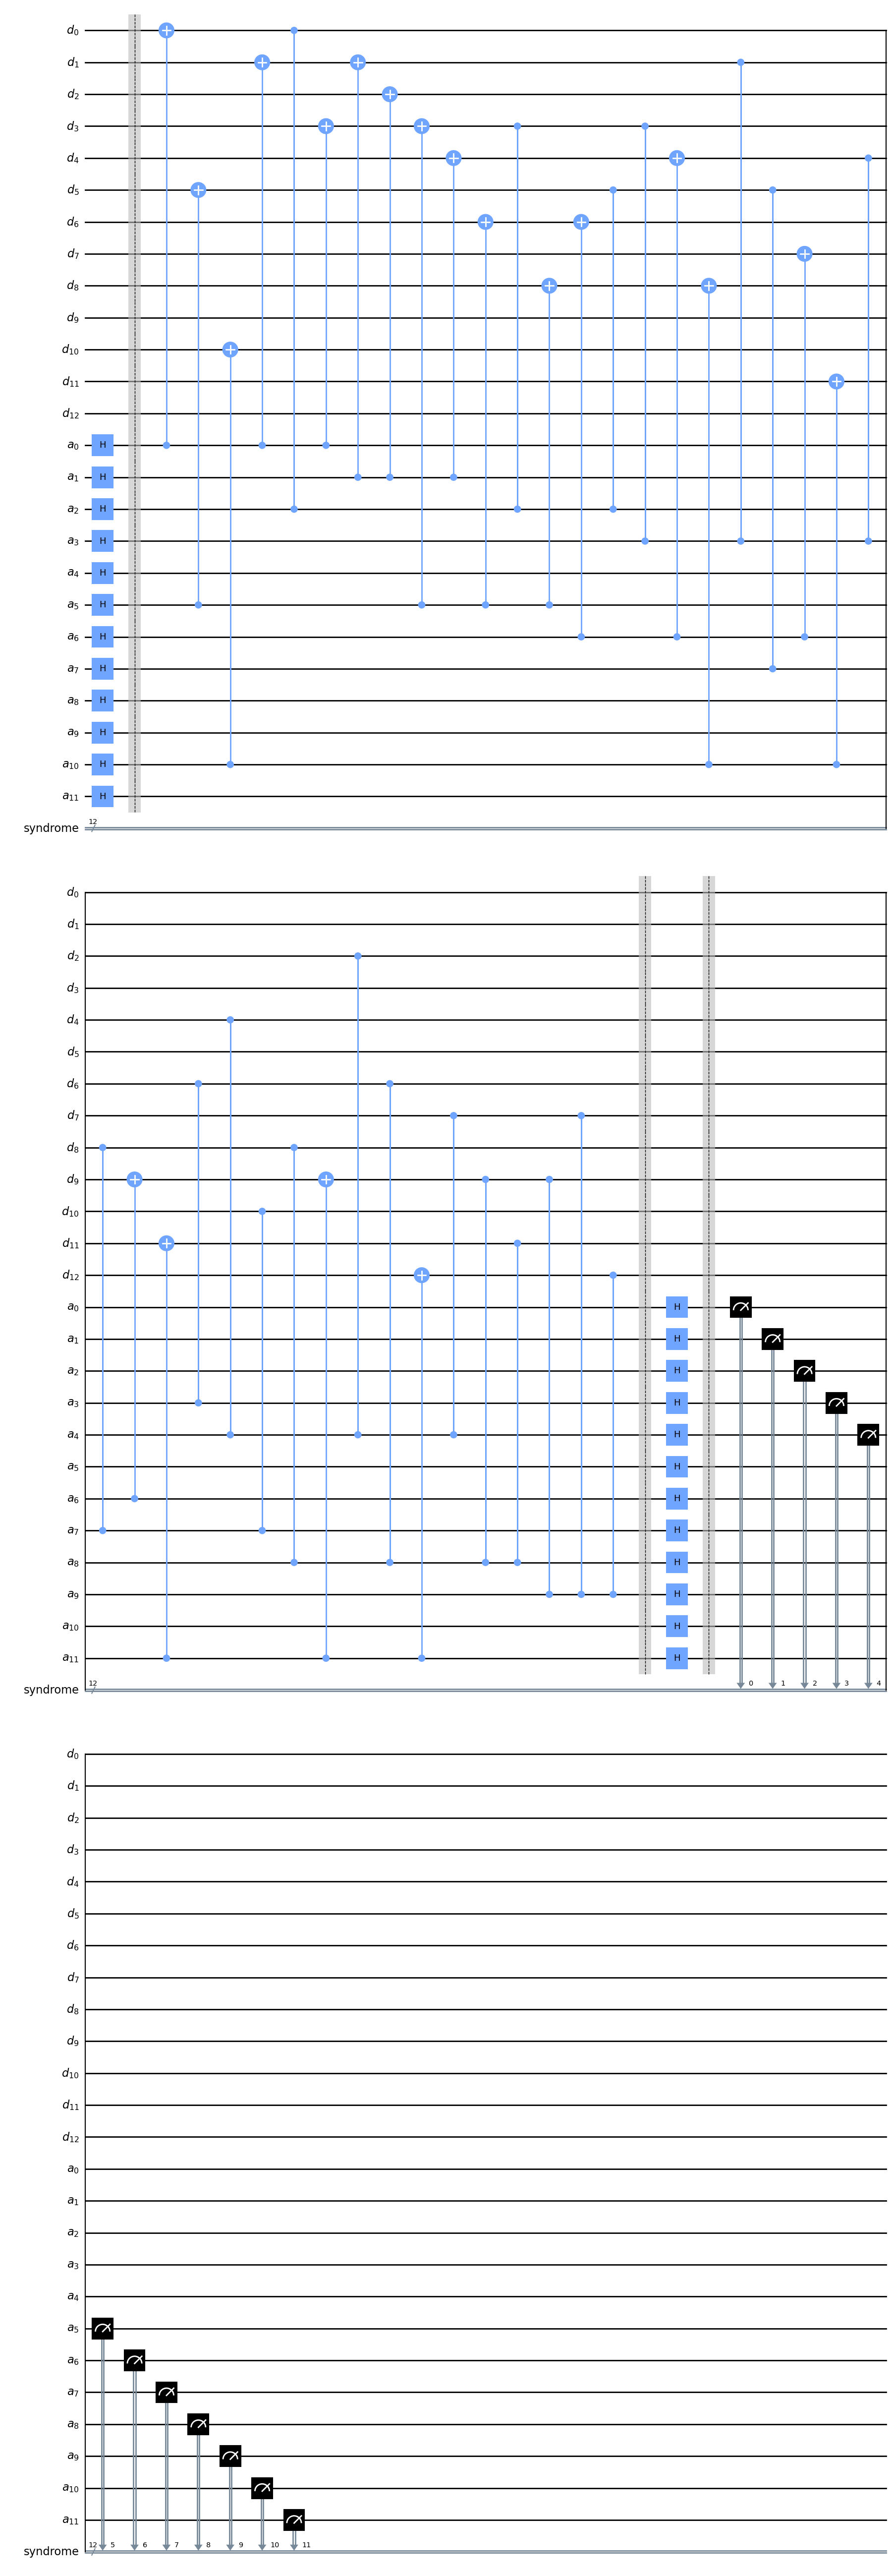

In [14]:
qc.draw('mpl')